# Loan-Approval-Prediction

### Problem Definition
Loan approval prediction poses a unique challenge due to the multifaceted nature of the factors that influence an applicant’s ability to repay a loan. Traditionally, loan officers have relied on a set of criteria—such as credit score, income level, age, and past loan repayment history—when determining the risk associated with lending money to an individual. However, this process often lacks objectivity and is subject to human bias, where subjective interpretations of the data can lead to unfair or inconsistent decisions. Additionally, the sheer volume of loan applications in large financial institutions makes it increasingly difficult for human evaluators to maintain accuracy and efficiency.



Dataset Overview
The dataset consists of 4,269 loan applications with 13 features, including:

* loan_id	= Unique Loan Identifier
no_of_dependents = Number of dependents
education = Graduate or Not
self_employed = Self-employed status (Yes/No)
income_annum = Annual income of applicant
loan_amount = Loan amount requested
loan_term = Duration of the loan (in months)
cibil_score	= Credit score of the applicant
residential_assets_value = Value of residential assets
commercial_assets_value	= Value of commercial properties
luxury_assets_value = Value of luxury assets (cars, jewelry)
bank_asset_value = Total bank savings/assets
loan_status	= Target variable (Approved = 1, Rejected = 0)

Data Loading & Exploration

* Load the dataset using pandas.
* Check dataset structure using .info() and .head().
* Identify missing values using .isnull().sum().
* Remove duplicate records if any exist.

In [32]:
import pandas as pd

dataset = pd.read_csv("loan_approval_dataset.csv")

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
dataset

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [36]:
dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
dataset.duplicated().sum()

np.int64(0)

In [11]:
dataset.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [37]:
dataset.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [13]:
dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Data Cleaning & Preprocessing

* Standardize column names by stripping extra spaces.
* Convert categorical variables (education, self_employed, loan_status) into numerical format

In [40]:
dataset.columns = dataset.columns.str.strip()

dataset = dataset.apply(lambda x:x.str.strip() if x.dtype == 'object' else x)

In [42]:
dataset["education"] = dataset["education"].replace({"Graduate":1,"Not Graduate":0})

dataset["self_employed"] = dataset["self_employed"].replace({"Yes":1,"No":0})

dataset["loan_status"] = dataset["loan_status"].replace({"Approved":1,"Rejected":0})

dataset

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
4264            0  
4265            1  
4266            0  
4267            1  
4268            1  

[4269 rows x 13 columns]

### Univariate analysis


* Visualize distributions of income, loan amount, credit score, and asset values using KDE plots.

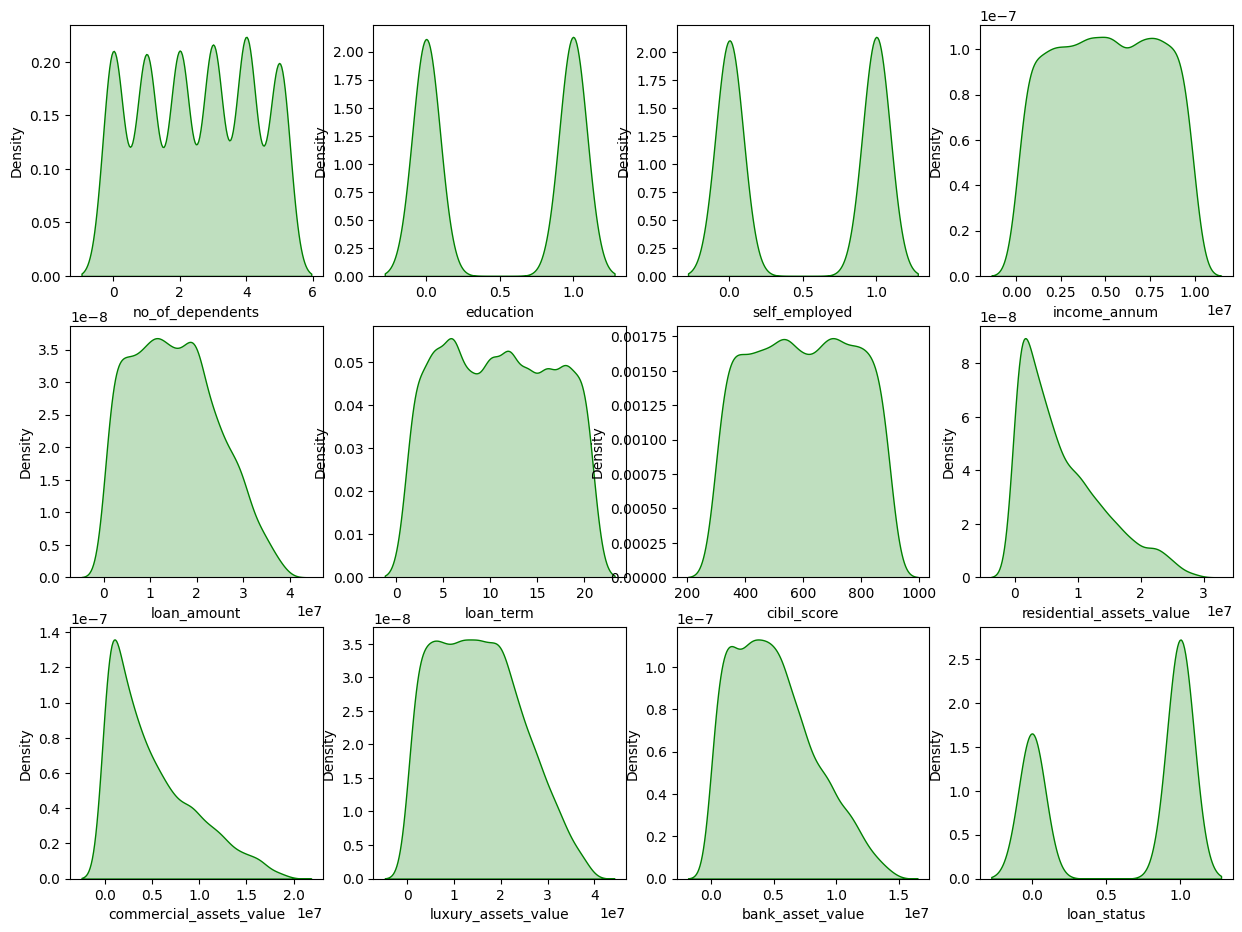

In [20]:


plt.figure(figsize = (15,15))

numerical_columns = ['no_of_dependents', 'education', 'self_employed',

       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',

       'residential_assets_value', 'commercial_assets_value',

       'luxury_assets_value', 'bank_asset_value', 'loan_status']

 

for i in range(0,len(numerical_columns)):

    plt.subplot(4,4,i+1)

    sns.kdeplot(x = dataset[numerical_columns[i]], fill = True,color = 'g')

    plt.xlabel(numerical_columns[i])

Insights:

* Most applicants have an annual income between ₹3-7 lakh.
* Majority of loans are under ₹2 crore, but a few high-value loans exist.
* CIBIL scores range from 300 to 900, with most applicants having a score above 600.

### Bivariate Analysis

* Use pairplots and scatter plots to explore relationships between variables.

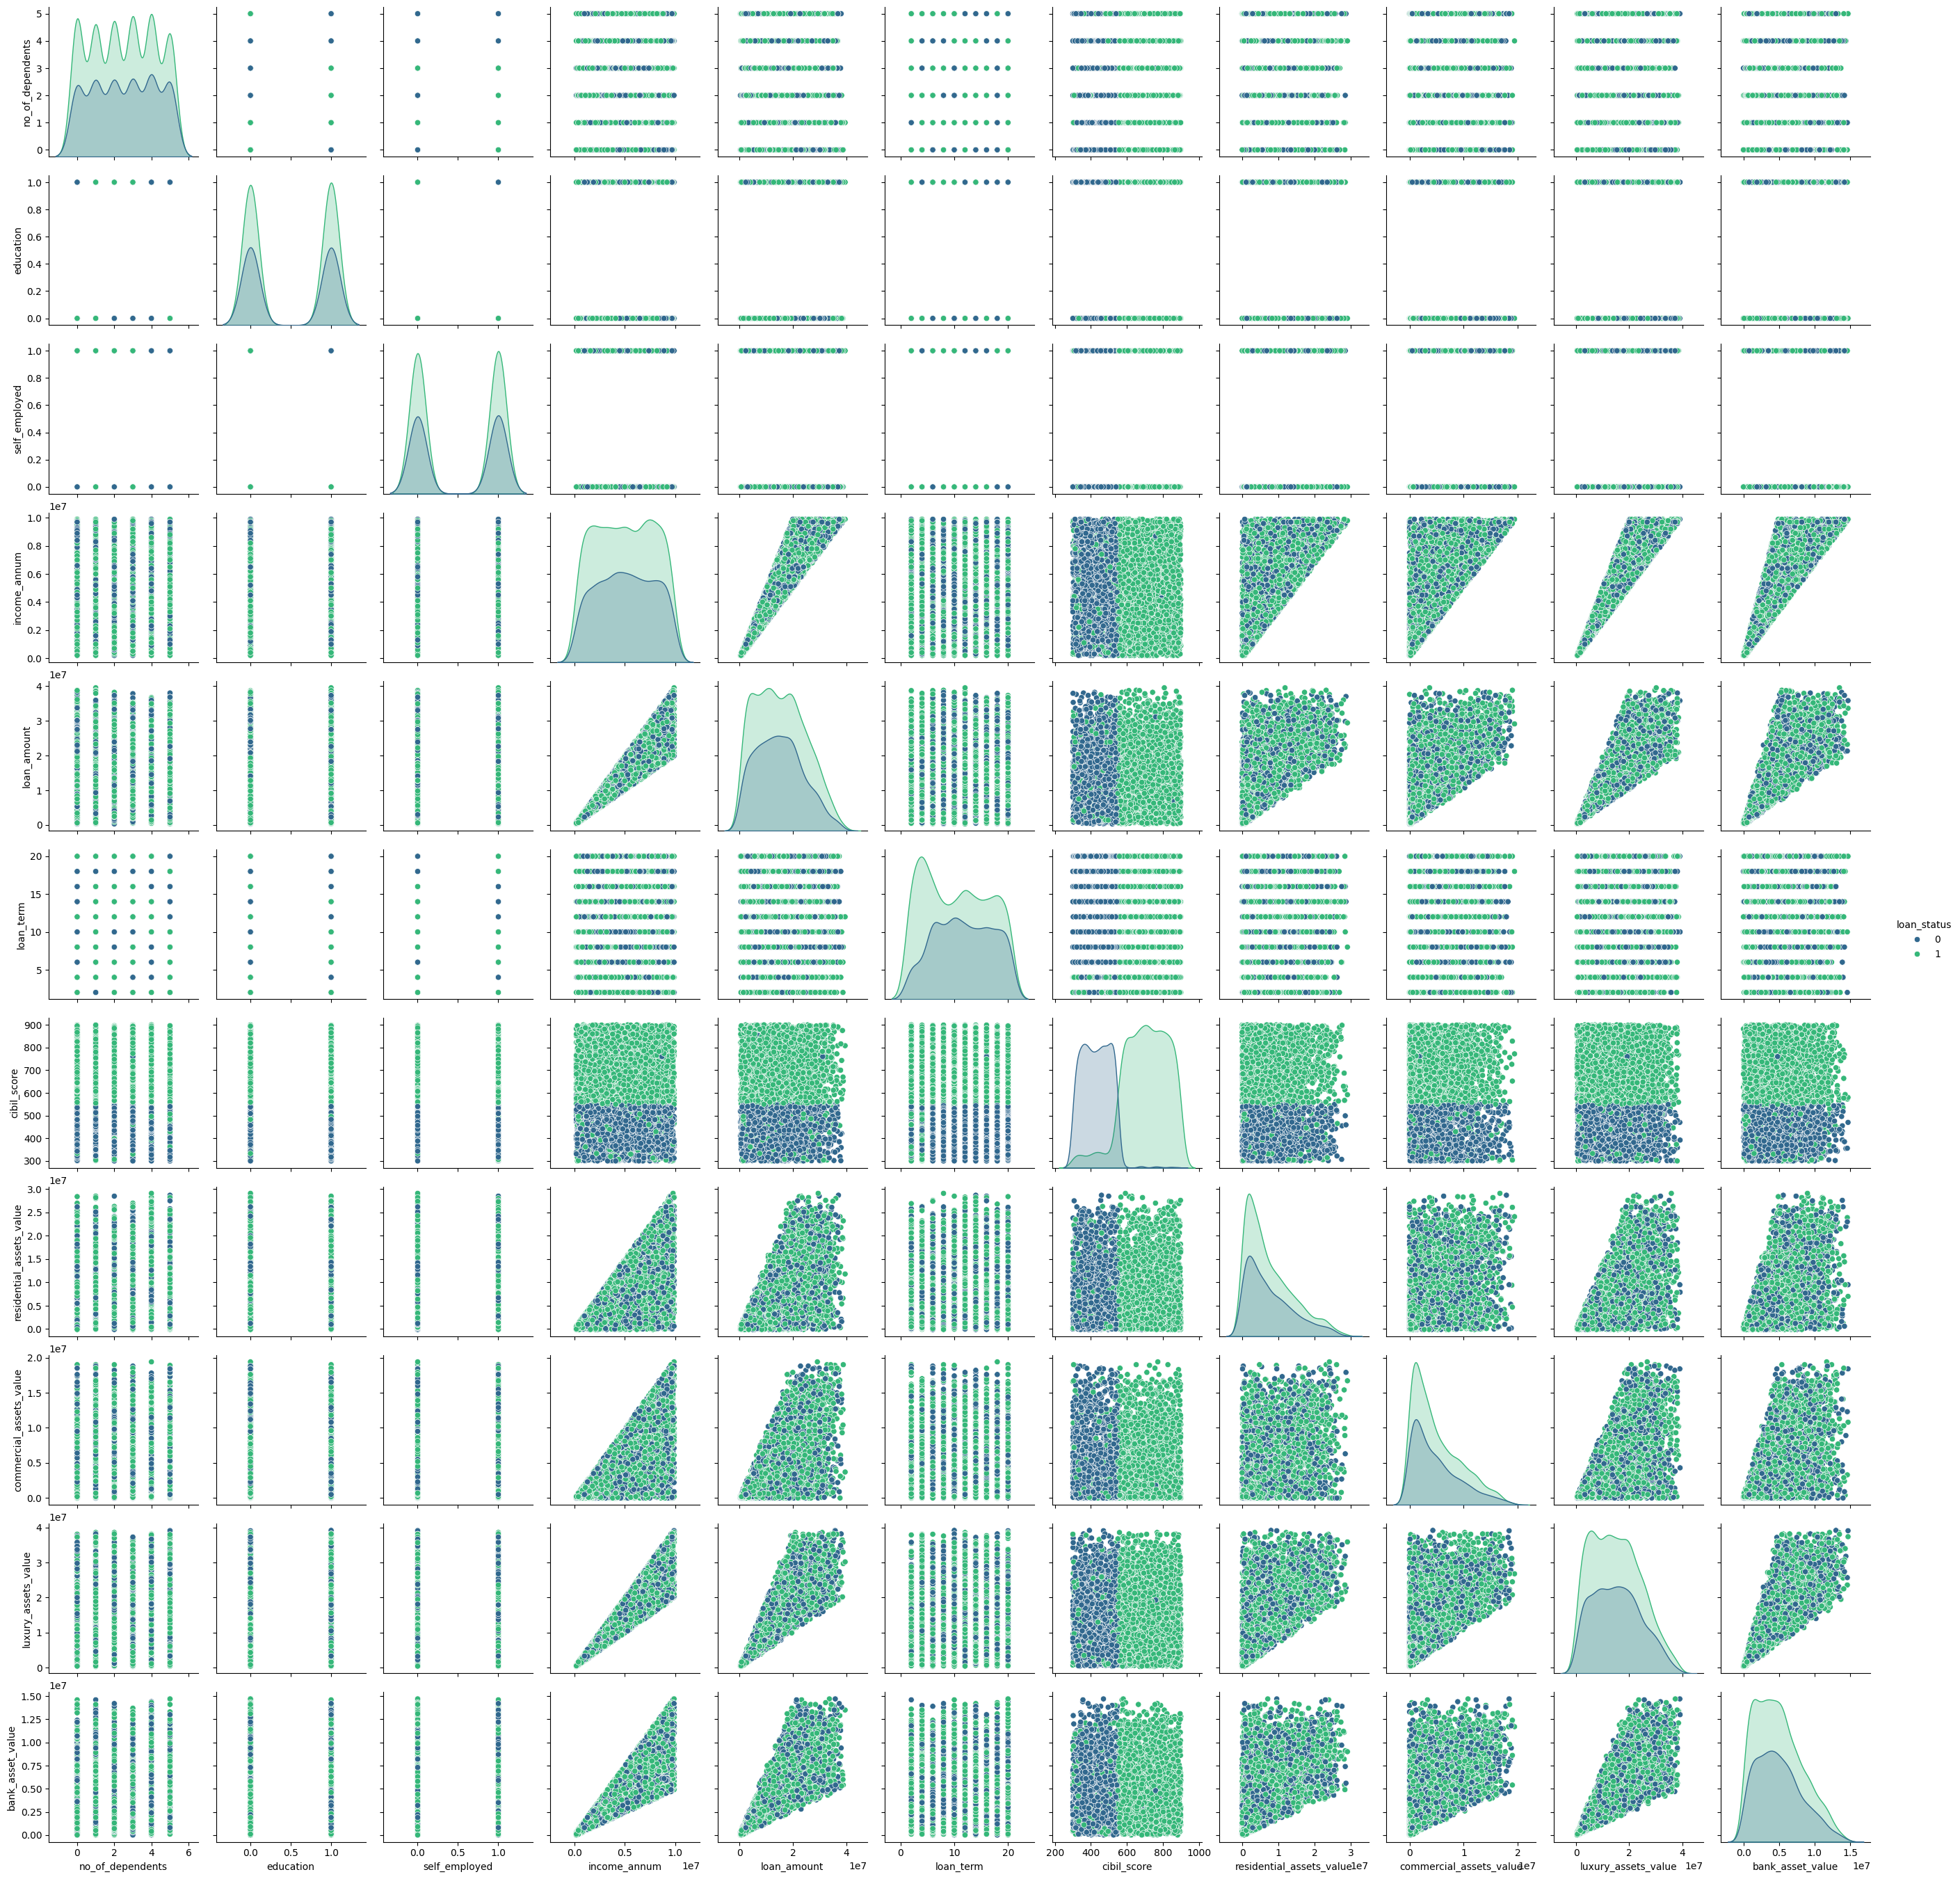

In [21]:
sns.pairplot(dataset[numerical_columns],hue = 'loan_status',palette = 'viridis')
plt.show()

Insights:

* Higher income increases the likelihood of loan approval.
* Applicants with higher CIBIL scores have better approval chances.
* Self-employed individuals have slightly lower approval rates compared to salaried employees.


### Feature Engineering

In [ ]:
* Create a new feature called total_assets to combine all asset values:
* Drop redundant columns (residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value).


In [43]:
dataset['total_assests'] = dataset['residential_assets_value'] + dataset['commercial_assets_value']+dataset['luxury_assets_value']+ dataset['bank_asset_value']


dataset.drop(columns = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],inplace = True)
dataset


loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score  loan_status  total_assests  
0        29900000         12          778            1       50700000  
1        12200000          8          417            0       17000000  
2        29700000         20          506            0       57700000  
3        30700000          8          467            0       52700000  
4        24200000         20          382            0       55000000  
...           ...        ...          ...          ...            ...  
4264      2300000         12          317            0        7400000  
4265     11300000         20          559            1       20000000  
4266     23900000         18          457            0       39000000  
4267     12800000          8          780            1       28800000  
4268     29700000         10          607            1       77300000  

[4269 rows x 10 columns]

In [44]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

### Model Training & Prediction

In [ ]:
* Train-Test Split & Feature Scaling
* Dataset split into 80% training and 20% testing.
* Feature scaling improves model performance.



In [55]:
x = dataset.drop(columns = 'loan_status')
y = dataset['loan_status']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [56]:
print('Accuracy', accuracy_score ( y_test,y_pred))

Accuracy 0.9063231850117096


In [57]:
print(classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



### Conclusion

In [ ]:
* Higher income, good credit score, and more assets increase loan approval chances.
* Self-employed individuals have slightly lower approval rates.
* Machine Learning can accurately predict loan approval with 90.6% accuracy.